In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [2]:
data = '/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv'
df = pd.read_csv(data)

### Exploring EDA

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df = df.rename(columns={
    'Invoice ID': 'invoice_id',
    'Branch' : 'branch',
    'City' : 'city',
    'Customer type': 'customer_type',
    'Gender' : 'gender',
    'Product line' : 'product_line',
    'Unit price' : 'unit_price',
    'Quantity' : 'quantity',
    'Tax 5%' : 'tax5%',
    'Total' : 'total',
    'Date' : 'date',
    'Time' : 'time',
    'Payment' : 'payment',
    'gross margin percentage' : 'gross_margin_percentage',
    'gross income' : 'gross_income',
    'Rating' : 'rating'
})

In [5]:
df.sample(10)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
46,370-41-7321,B,Mandalay,Member,Male,Health and beauty,56.69,9,25.5105,535.7205,2/27/2019,17:24,Credit card,510.21,4.761905,25.5105,8.4
459,729-46-7422,C,Naypyitaw,Normal,Male,Food and beverages,35.89,1,1.7945,37.6845,2/23/2019,16:52,Credit card,35.89,4.761905,1.7945,7.9
54,242-55-6721,B,Mandalay,Normal,Male,Home and lifestyle,16.16,2,1.6160,33.9360,3/7/2019,11:49,Ewallet,32.32,4.761905,1.6160,6.5
889,880-46-5796,A,Yangon,Member,Male,Sports and travel,76.92,10,38.4600,807.6600,3/17/2019,19:53,Ewallet,769.20,4.761905,38.4600,5.6
710,786-94-2700,A,Yangon,Member,Male,Food and beverages,80.62,6,24.1860,507.9060,2/28/2019,20:18,Cash,483.72,4.761905,24.1860,9.1
145,458-41-1477,C,Naypyitaw,Normal,Female,Health and beauty,46.26,6,13.8780,291.4380,3/8/2019,17:11,Credit card,277.56,4.761905,13.8780,9.5
260,850-41-9669,A,Yangon,Normal,Female,Electronic accessories,75.06,9,33.7770,709.3170,3/19/2019,13:25,Ewallet,675.54,4.761905,33.7770,6.2
659,491-38-3499,A,Yangon,Member,Male,Fashion accessories,55.45,1,2.7725,58.2225,2/26/2019,17:46,Credit card,55.45,4.761905,2.7725,4.9
604,484-22-8230,C,Naypyitaw,Member,Female,Fashion accessories,51.89,7,18.1615,381.3915,1/8/2019,20:08,Cash,363.23,4.761905,18.1615,4.5
671,642-61-4706,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.3400,196.1400,3/30/2019,16:34,Cash,186.80,4.761905,9.3400,5.5


In [6]:
df.shape

(1000, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax5%                    1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [8]:
df.nunique()

invoice_id                 1000
branch                        3
city                          3
customer_type                 2
gender                        2
product_line                  6
unit_price                  943
quantity                     10
tax5%                       990
total                       990
date                         89
time                        506
payment                       3
cogs                        990
gross_margin_percentage       1
gross_income                990
rating                       61
dtype: int64

In [9]:
### invoice_id ve gross_margin_percentage düşürülebilir.
### branch, city, customer_type, gender, product_line,payment, quantity kategorik değişken olması mümkün bunlar makien öğreneimi yapılacaksa Label ya da Order encoder yapılabilir.
### invoice_id and gross_margin_percentage can be reduced.
#### branch, city, customer_type, gender, product_line, payment, quantity can be categorical variables, if these are to be machine learnt, Label or ORder encoder can be made.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
tax5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross_margin_percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross_income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [11]:
df.isnull().sum() # Perfect

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax5%                      0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: date, dtype: datetime64[ns]

In [15]:
df['branch'].value_counts()

branch
A    340
B    332
C    328
Name: count, dtype: int64

In [16]:
df['city'].value_counts()

city
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [17]:
df['customer_type'].value_counts()

customer_type
Member    501
Normal    499
Name: count, dtype: int64

In [18]:
df['gender'].value_counts()

gender
Female    501
Male      499
Name: count, dtype: int64

In [19]:
df['product_line'].value_counts()

product_line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [20]:
df['payment'].value_counts()

payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [21]:
df['quantity'].value_counts()

quantity
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: count, dtype: int64

 ### and Viz 

In [22]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [23]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8


In [24]:
df = df.rename(columns={
    'Year': 'year',
    'Month' : 'month',
    'Day' : 'day'})

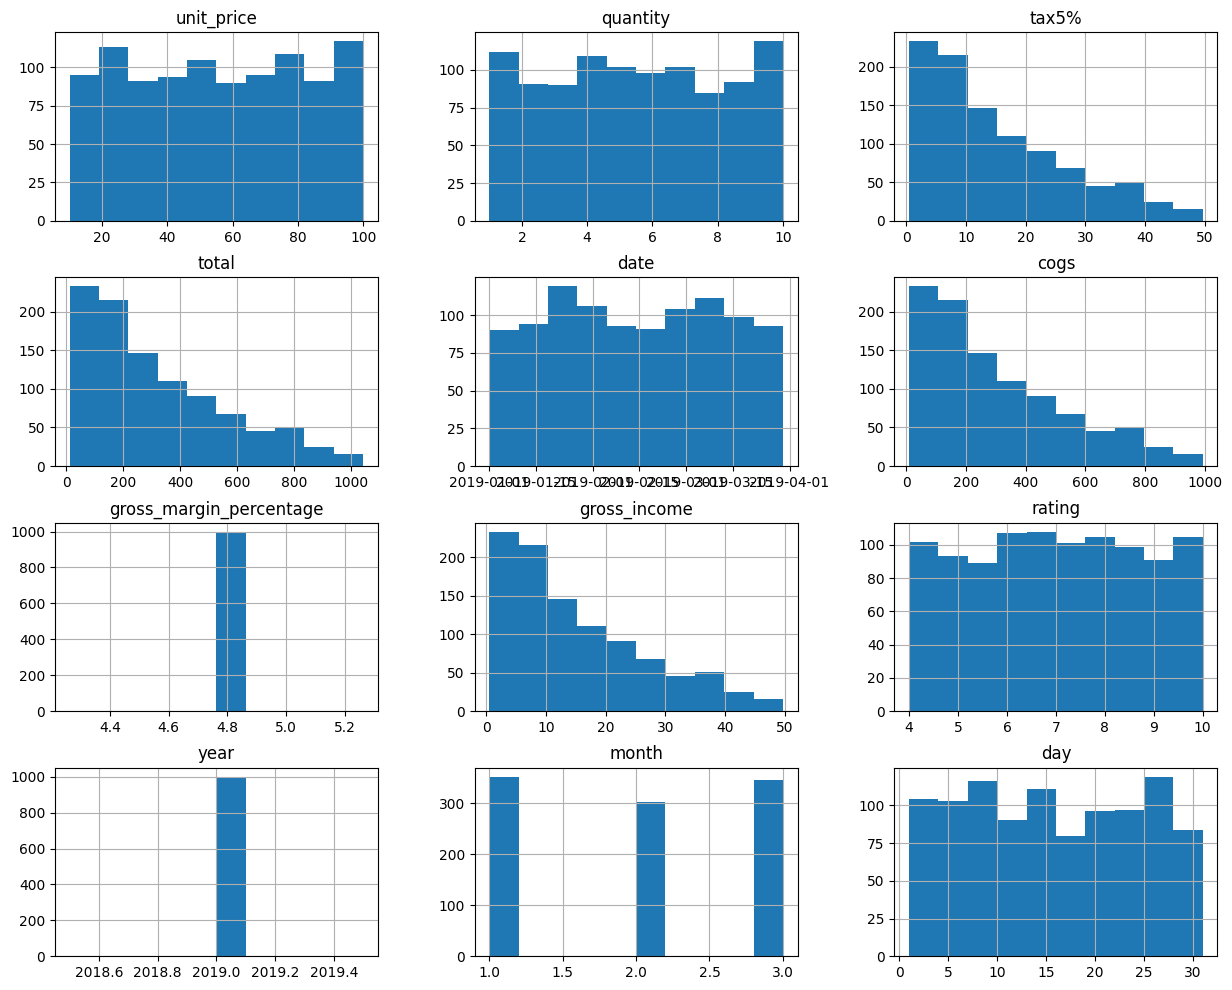

In [25]:
df.hist(figsize = (15,12))
plt.show()

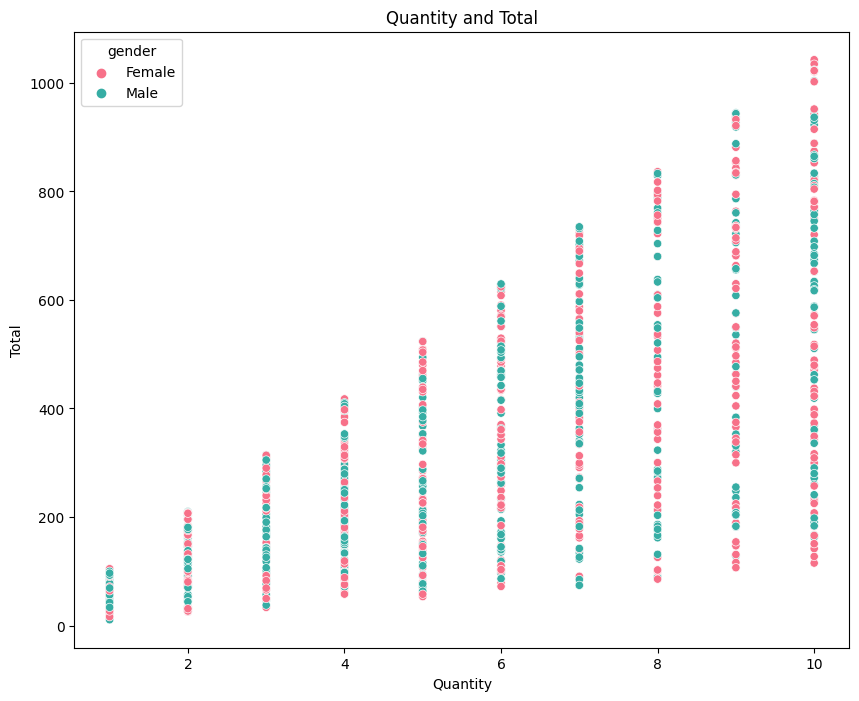

In [26]:
plt.figure(figsize= (10,8))
sns.scatterplot(data=df, x='quantity', y='total', hue='gender', palette='husl')
plt.xlabel('Quantity')
plt.ylabel('Total')
plt.title('Quantity and Total')
plt.legend(title = 'gender')
plt.show()

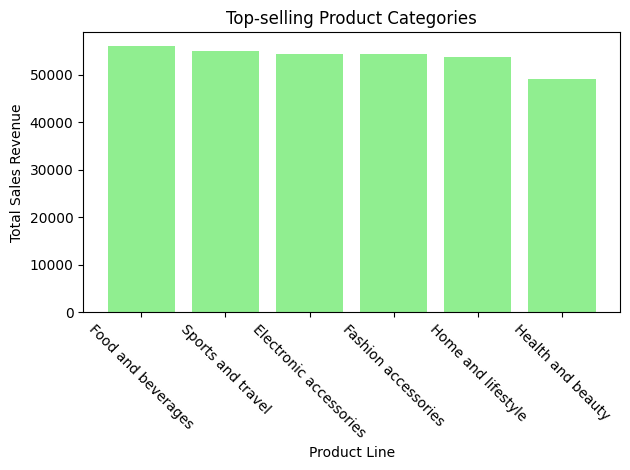

In [27]:
sales_by_product_line = df.groupby('product_line')['total'].sum().sort_values(ascending=False)

top_selling_categories = sales_by_product_line.head(6)

plt.bar(top_selling_categories.index, top_selling_categories.values, color='lightgreen')
plt.title('Top-selling Product Categories')
plt.xlabel('Product Line')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=315) 
plt.tight_layout()
plt.show()

In [28]:
value_counts = df['gender'].value_counts()
categories = value_counts.index
counts = value_counts.values

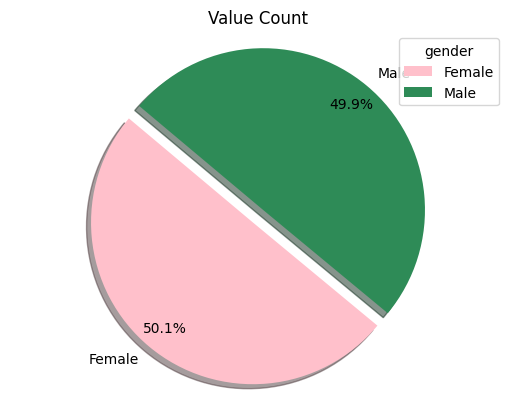

In [29]:
colors =['pink','seagreen']
explode = [0.05]*len(counts)

plt.pie(counts, explode = explode, shadow = True, labels = categories, autopct = '%1.1f%%', startangle=140, pctdistance = 0.85, colors= colors)
plt.axis('equal')
plt.title('Value Count')
plt.legend(categories, title = 'gender', loc='best')
plt.show()

In [30]:
sales_by_customer_type = df.groupby('customer_type')['total'].sum().reset_index()

In [31]:
fig = px.bar(sales_by_customer_type, x='customer_type', y='total',
            title = 'Total Sales Revenue by Customer Type',
            labels = {'total': 'Total Sales Revenue'},
            color= 'customer_type',
            color_discrete_map = {'Member': 'peachpuff', 'Normal':'lightgreen'})

fig.update_layout(xaxis_title = 'Customer Type', yaxis_title='Total Sales Revenue')
fig.show()

In [32]:
sales_by_city = df.groupby('city')['total'].sum().sort_values(ascending=False)

top_selling = sales_by_city.head(10)

fig = px.bar(x=sales_by_city.index,
             y=sales_by_city.values, 
             color=sales_by_city.index,
             labels={'x': 'City', 'y': 'Top Sales'},
             title='Top Sales by Cities')
fig.update_xaxes(tickangle=315)  
fig.show()

In [33]:
payment_frequency = df['payment'].value_counts().reset_index()
payment_frequency.columns = ['payment','frequency']

fig = px.bar(payment_frequency, x= 'payment', y='frequency',
            title='Frequency of Payment Methods',
            labels = {'frequency':'Frequency', 'payment' : 'Payment Method'},
            color = 'payment',
            color_discrete_map = {'Cash' : 'fuchsia', 'Credit Card' : 'lightgreen', 'Ewallet' : 'Red'})

fig.update_layout(xaxis_title = 'Payment Method', yaxis_title = 'Frequency')

fig.show()

In [34]:
fig = px.box(df, x = 'product_line', y = 'tax5%',
            title = 'Distribution of Tax Amounts Across Product Categories',
            labels = {'product_line' : 'Product category', 'tax5%' : 'Tax Amount'},
            color= 'product_line')

fig.show()

In [35]:
df['time'] = pd.to_datetime(df['time'])

df['time_of_day'] = pd.cut(df['time'].dt.hour,
                          bins = [0,6,12,18,24],
                          labels = ['Night','Morning','Afternoon','Evening'],
                          include_lowest =True)

sales_by_time = df.groupby('time_of_day')['total'].sum().reset_index()

fig= px.bar(sales_by_time,
            x='time_of_day',
            y='total',
            title='Total Sales by Time of Day',
            labels={'total':'Total Sales $', 
                   'time_of_day': 'Time of Day'},
            color='time_of_day',
            color_discrete_map ={'Night': 'blue', 
                                'Morning' : 'yellow',
                                'Afternoon':'orange',
                                'Evening':'red'})

fig.update_layout(xaxis_title = 'Time of Day', 
                  yaxis_title = 'Total Sales ($)')

fig.show()

In [36]:
fig = px.scatter(df,
                x='rating',
                y='total',
                color='rating',
                title= 'Customer vs Sales',
                labels={'rating':'Customer Rating',
                       'total':'Sales ($)'},
                trendline='ols')

fig.show()

In [37]:
corr = df['rating'].corr(df['total'])
corr

-0.03644170499701834

There is no significant correlation.

In [38]:
branch_sales = df.groupby('branch')['total'].sum()
city_sales = df.groupby('city')['total'].sum()

branch_max_sales = branch_sales.idxmax()
city_max_sales = city_sales.idxmax()

print("Branch with the highest sales revenue:", branch_max_sales)
print("City with the highest sales revenue:", city_max_sales)

Branch with the highest sales revenue: C
City with the highest sales revenue: Naypyitaw


In [39]:
df['time'] = pd.to_datetime(df['time'])

df['hour'] = df['time'].dt.hour

hourly_sales = df.groupby('hour')['total'].sum().reset_index()

fig = px.line(hourly_sales,
             x = 'hour',
             y = 'total',
             title = 'Distribution of Sales Throughout The Day',
             labels = {'hour' : 'hours of the Day',
                       'total' : 'Total Sales Revenue($)'},
             markers = True)

fig.show()

We can observe fluctuations in sales revenue throughout the day. The highest sales revenue occurs at 19:00 and the lowest at 20:00. This distribution of sales throughout the day can help identify peak hours and optimise staffing or promotional efforts accordingly.

In [40]:
gender_product_sales = df.groupby(['gender','product_line'])['total'].sum().unstack().reset_index()

gender_product_sales_melted = pd.melt(gender_product_sales,
                                     id_vars = 'gender',
                                     var_name = 'Product Category',
                                     value_name = 'Total Sales')

fig = px.bar(gender_product_sales_melted,
            x='Product Category',
            y='Total Sales',
            color='gender',
            title='Purchasing Behavior by Gender and Product Category',
            labels={'Product Category': 'Product Category', 'Total Sales': 'Total Sales Revenue ($)'},
            barmode='stack')
             
             
fig.show()